# Convolutional Neural Network (CNN)

<h4 align='center'>Typical CNN architecture<h4/>
<img src='https://artecs.dacya.ucm.es/wp-content/uploads/2018/12/Typical_cnn.png' />

## 3 basic ideas

The three basic ideas behind convolutional neural networks (CNNs) are: Local receptive fields, Shared weights, Pooling

**Local receptive fields**

- Each neuron in a convolutional layer is only connected to a **small region** of previous layer, called the receptive field.

- the small learnable weight matrix of Local receptive field is called feature detector/filter/kernel/feature detector

- used to capture spatial information (local patterns and features) from an image.  an image is a 2D vector of pixel values, each pixel is a feature/pattern in images are localized, we can learn this features by scanning across images
    

**Shared weights**

- In a convolutional layer, the same set of weights is applied to every receptive field in the previous layer bc same filter detect same feature 

- reduces the number of parameters in the network, faster training, allowing it to learn from less data and to generalize better.

**Pooling**

- a type of downsampling

- typically applied after a convolutional layer.

- capture the most salient features in the input, 

- reduce complexity, prevent overfitting: learn the rough location rather than exact location of feature, make CNN robust to noise and distortion

- reduce spatial size of output and create translation scale invariance. 

- methods: max, k-max, average, L2, dynamic pooling

## translational invariance and scale invariance

CNN induce translational invariance and scale invariance in image features

Translational Invariance:

- CNN can recognize a pattern regardless of its **position** in the input image.

- Achieved by conv operation, which uses the same filters across the entire input.


Scale Invariance:

- recognize a pattern regardless of its **size** in the input image. crucial for object detection.

- Not present in standard CNN architecture, achieved by multi-scale techniques:

    - Data augmentation: transformations (scaling, resizing, cropping, etc.) are applied randomly to the input images during training. 

    - Image pyramids: Create a set of images with different resolutions of the same image, and process them separately or in combination.
    
    - Multi-scale feature extraction: filters in the same conv layer have different sizes. e.g.GoogLeNet.
    
    - Feature pyramids: conv layers with filters of at different depth. Building a hierarchical representation of features, where higher levels of the pyramid correspond to coarser (larger-scale) features and lower levels correspond to finer (smaller-scale) features.

<table>
<img src='https://www.researchgate.net/profile/Terje-Midtbo/publication/318967374/figure/fig3/AS:669210783002628@1536563692236/Example-of-features-that-the-filters-in-a-convolution-layer-look-for-at-different-levels.png' style='width: 40%; height: auto;'/>
<img src='https://gaoxiangluo.github.io/2021/01/06/Convolutional-Neural-Network-CNN-Overview/figure26.png' style='width: 60%; height: auto;'/>
<table/>

# upsampling vs. deconv, downsampling vs conv

| Technique           | Description               | Method| Pros                                           | Cons                                           |
|---------------------|--------------------|-----------|------------------------------------------------|------------------------------------------------|
| Upsampling          | Interpolation      | nearest-neighbor, bilinear, bicubic interpolation|Computationally efficient <br> Simpler implementation than learning | Artifacts or blurriness |
| Deconvolution       | Learnable Upsampling| stride, padding, dilating|Learnable parameters, can adapt to specific tasks and data <br> Smoother results | Computationally expensive <br> Checkerboard artifact |
| Downsampling        | Reduction          | pooling, decimation| Computationally efficient <br> Efficient feature extraction | Aliasing artifact <br> May lose important information |
| Convolution         | Feature Extraction | stride, padding, dilating|Learnable parameters <br> Local feature extraction | Computationally expensive <br> Aliasing artifact|


# upsampling and downsampling

Upsampling and downsampling are techniques to modify size of images while preserving their overall structure and content for different layers requiring images of varying resolutions.

Upsampling and downsampling focus on reducing computational complexity, not involve learning parameters

## Upsampling

Increasing the resolution or size of an image.

methods: nearest-neighbor, bilinear, bicubic interpolation.

- Nearest-neighbor interpolation: Assigns the value of the nearest pixel to each new pixel. Fast but can result in blocky images.

- Bilinear interpolation: Averages the values of the four nearest pixels, weighted by their distance to the new pixel. Smoother results but slightly slower.

- Bicubic interpolation: Considers 16 neighboring pixels, using a cubic function to determine weights. Smoother than bilinear but slower.


## Downsampling

Decrease resolution or size of an image.

methods: decimation, pooling

- Decimation (Subsampling) 抽取: Selects every n-th pixel from the image, discarding the rest. This method reduces the size of the input signal by a factor of n. Fast but can result in aliasing artifacts.

- Average pooling: Divides the image into non-overlapping regions and assigns the average value of each region to the new pixel. Reduces aliasing but can blur edges.

- Max pooling: Similar to average pooling, but assigns the maximum value of each region to the new pixel. Better at preserving edges.

- static pooling: pooling paramters are fixed, 

    e.g., average pooling, max pooling, min pooling.

- Dynamic pooling: pooling parameters are determined **dynamically based on the input size**.

    e.g., Dynamic average pooling, Dynamic max pooling (adaptive, k-max)

    Adaptive pooling: maintaining a consistent output size

    k-max pooling: preserve relative order of top k features

### k-max pooling

- useful in NLP tasks where the relative order of features is essential. 

- help identify if a specific feature appears at least k times in the input text.

- selects the top k values from a given region in the input data, preserving their relative order. 

Algorithm

For a given input sequence x = [5, 2, 9, 3, 8, 1], where n is the length of the sequence, and a specified k = 3 (k <= n), perform the following steps.

1. Identify the top k values from the input sequence using any sorting algorithm, e.g., priority queue

    x = [5, 9, 8, 2, 3, 1]

2. Preserve the relative order of the selected k values as they appear in the original input sequence.

    k_max_pooled_x = [5, 9, 8]
    

3. Output the ordered k-max pooled sequence. 

### Dynamic k-max pooling

Dynamic k-max pooling

- a variation of the k-max pooling operation more adaptable to varying input sizes and network depths. 

- value of k is a function of **input length and current layer index** in a deep CNN

    $$
    k = \max(\text{k\_top}, \left \lceil \frac{(L-l)n}{L} \right \rceil)
    $$

    - $\text{k\_top}$ is the desired value of k at the top layer, determines the minimum value of k, preventing it from becoming too small as progress through the layers.

    - $L$ is the total number of layers in the network.

    - $l$ is 1-based current layer index (e.g. 1 for the first layer).

    - $n$ is the length of the input sequence.


- prons of decreasing $k$ as move deeper into the network 

    capture higher-level and more abstract features in deeper layers, 
    
    focus on the most relevant features while discarding less relevant information. 

    help reduce computational complexity and memory requirements

# convolution and deconvolution

deconvolution and convolution emphasize learning patterns and features from the data.

convolution

- use a learnable kernel to generate an output with smaller spatial dimensions than the input.

deconvolution/Transposed convolution/fractionally-strided convolution

- use a learnable kernel to generate an output with larger spatial dimensions than the input.

filter: 

- different filters at same layer detect a particular feature, e.g., Gaussian blur (approximation), box blur (normalized), sharpen, edge detection, identity

- filters at layer of different depth detect features of different level, e.g., shallower layers detect eys and mouths, deeper layers detect body.

    
feature map/convolved feature

- output of conv layer, embedding of images. 

- calculated by pointwise multiply input and filter, sum over results, then move a stride.

hyperparameters:

- weight and height of filter: typically weight = height

- stride: controls how many pixels of an image to slide over

- padding (Wide convolution): zero padding is padding 0s to outside of an image. allows the filter to cover the entire image, including edge pixels.

- depth: number of filters = number of features to detect = number of features maps

<h4 align='center'>Convolution vs. Deconvolution<h4/>
<h5>
<table>
    <tr>
        <td style="text-align: center;">Standard Conv <br>(padding = 1, stride = 2)<br><img src='https://maucher.home.hdm-stuttgart.de/Pics/gif/padding_strides.gif' alt="gif1"></td>
        <td style="text-align: center;">Dilated Conv <br>(padding = 0, dilation rate = 2)<br><img src='https://upload.wikimedia.org/wikipedia/commons/c/c1/Convolution_arithmetic_-_Dilation.gif' alt="gif1"></td>
        <td style="text-align: center;">Deconv <br>(padding = 1, stride = 2)<br><img src='https://maucher.home.hdm-stuttgart.de/Pics/gif/padding_strides_transposed.gif' alt="gif2"></td>
    </tr>
</table>
<h5/>
<h5>Note: blue square (input), grey square (filter), dash (padding), green square (feature map)</h5>

### Dilated convolution 

- 扩张卷积 (atrous convolution) is a variant of standard convolution operation, kernel is applied to the input with a spacing or dilation rate ( > 1). 

- useful for tasks: image segmentation (e.g., DeepLab), NLP tasks that require capturing long-range dependencies.

- **dilation rate** (r > 1): determines the gap between the kernel elements

<h5>Kernels with different dilation rates (r = 1, 2, 3)<h5/>
<table>
<img src='https://www.researchgate.net/publication/320195101/figure/fig2/AS:669211164692494@1536563783748/Dilated-convolution-On-the-left-we-have-the-dilated-convolution-with-dilation-rate-r.png' style='width: 40%; height: auto:'/>

<img src='https://i.stack.imgur.com/7wJDc.gif' style='width: 50%; height: auto:'/>
<table/>

Pros:

- Larger receptive field: By **increasing dilation rate**, we can increase size of receptive field without increase kernel size (number of parameters). useful when trying to capture long-range dependencies or context information in the input data.

- Reduced computation: compared to standard convolutions with larger kernel sizes, as fewer multiplications are required. e.g. a 3x3 dilated convolution with a dilation rate of 2 has 9 parameters, but the receptive field is increased from 3x3 to 5x5, same as a 5x5 standard convolution (which has 25 parameters) 

- Multi-scale feature learning: by **varying dilation rate**, dilated convolution can capture information from different scales or resolutions within the input while retaining spatial information. Compared to using pooling layers to achieve multi-scale feature learning, the spatial resolution of the feature maps is reduced, and some spatial information is lost.

Cons:

- checkerboard artifacts: when dilated kernel does not cover the entire input uniformly. caused by the gaps in the dilated kernel. lose some fine-grained spatial information.

## visualize feature map and learned filter give insight

<img src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ixuhX9vaf1kUQTWicVYiyg.png' style='width: 50%; height: auto:'/>

[visualize filters in each layer](https://adamharley.com/nn_vis/)

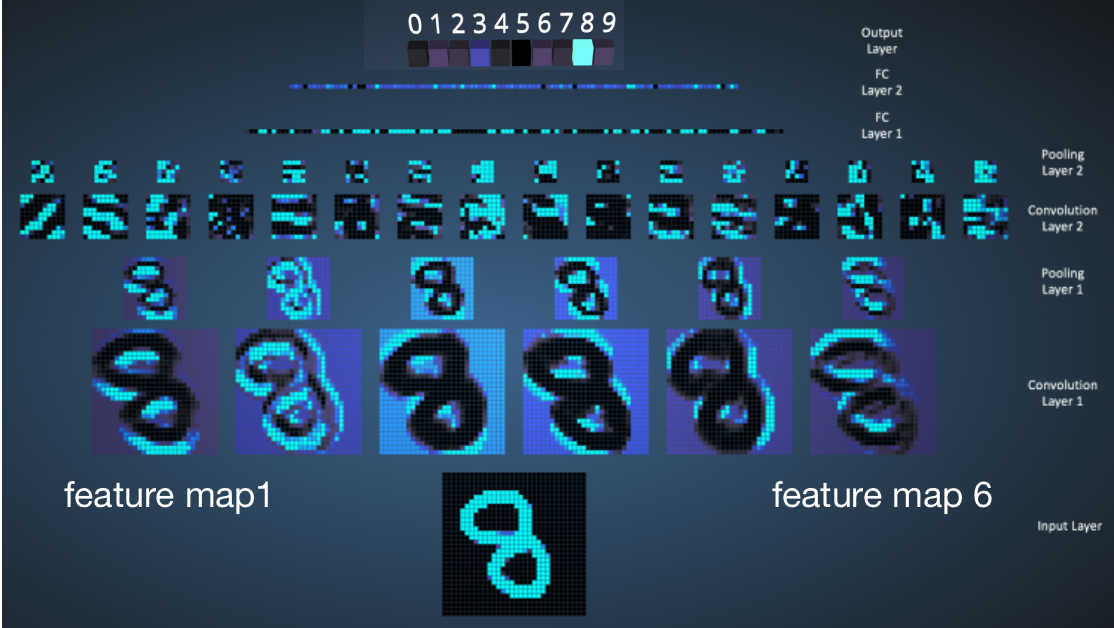

## filter-wise normalization

Filter-wise normalization is a technique used in convolutional neural networks to normalize the output of each filter in a layer. The idea behind this is to ensure that each filter has a similar range of values, which can help prevent the saturation of individual filters and improve the overall performance of the network.

The formula for filter-wise normalization is as follows:

\begin{equation}
x_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{k=1}^{n} (x_{kj} - \mu_j)^2 + \epsilon}}
\end{equation}

In this formula, $x_{ij}$ is the output of the $i$ th filter at the $j$th spatial location, $n$ is the number of filters, $\mu_j$ is the mean activation across all filters at the $j$ th spatial location, and $\epsilon$ is a small constant to prevent division by zero.

By normalizing the output of each filter, filter-wise normalization can help prevent the saturation of individual filters and improve the overall performance of the network.

# artifact

| Artifact Type | Description                                       | Reason                                    | Solution                                              |
|---------------|---------------------------------------------------|-------------------------------------------|-------------------------------------------------------|
| Checkerboard  | Regular grid-like patterns in output images      | Improper deconv   | upsampling followed by conv, or properly designed decov (e.g., initializing weights with bilinear interpolation) |
| Aliasing      | Jagged edges or moiré patterns in output images | Undersampling of high-frequency components | downsampling (average/max pool) before conv, or low-pass filter |


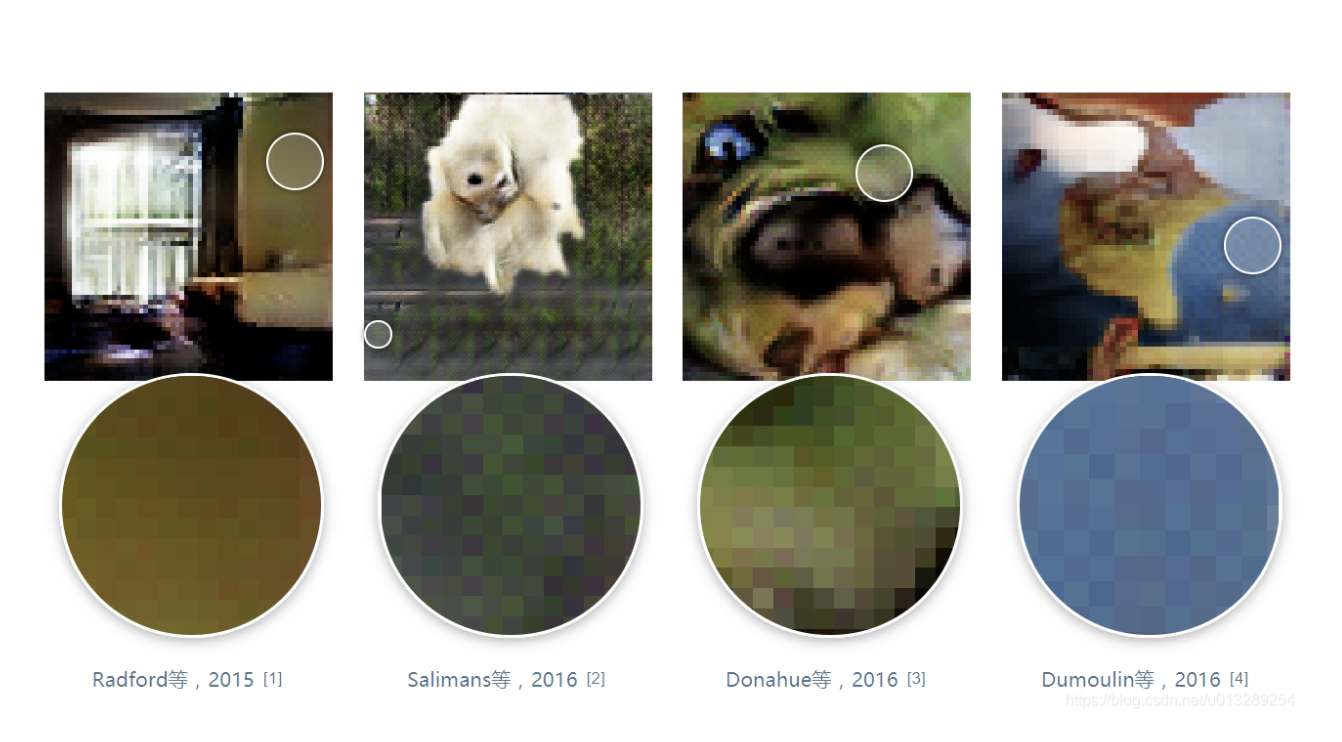